# San Francisco Housing Rental Analysis

In this assignment, you will perform basic analysis for the San Francisco Housing Market to allow potential real estate investors to choose rental investment properties. 

In [58]:
# initial imports
import os
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import hvplot.pandas
from pathlib import Path
from dotenv import load_dotenv

%matplotlib inline

In [59]:
# Read the Mapbox API key
load_dotenv()
mapbox_token = os.getenv("MAPBOX_API_KEY")
px.set_mapbox_access_token(mapbox_token)

## Load Data

In [60]:
# Read the census data into a Pandas DataFrame
file_path = Path("Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")
sfo_data.head()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
year,,,,
2010,Alamo Square,291.182945,372560,1239
2010,Anza Vista,267.932583,372560,1239
2010,Bayview,170.098665,372560,1239
2010,Buena Vista Park,347.394919,372560,1239
2010,Central Richmond,319.027623,372560,1239


- - - 

## Housing Units Per Year

In this section, you will calculate the number of housing units per year and visualize the results as a bar chart using the Pandas plot function. 

Hint: Use the Pandas groupby function

Optional challenge: Use the min, max, and std to scale the y limits of the chart.

In [61]:
# Calculate the mean number of housing units per year (hint: use groupby) 
# YOUR CODE HERE!
sfo_data.isnull().sum()
sfo_data = sfo_data.dropna()
sfo_data.isnull().sum()
sfo_data_by_year = sfo_data.groupby('year').mean()
mean_housing_units = sfo_data_by_year['housing_units']
mean_housing_units

year
2010    372560
2011    374507
2012    376454
2013    378401
2014    380348
2015    382295
2016    384242
Name: housing_units, dtype: int64

In [62]:
miny = mean_housing_units.min()
miny
maxy = mean_housing_units.max()
maxy
std = mean_housing_units.std()
std

4206.0007132667015

Text(0.5, 0, 'Year')

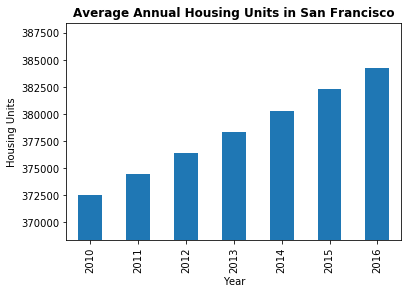

In [63]:
# Use the Pandas plot function to plot the average housing units per year.
# Note: You will need to manually adjust the y limit of the chart using the min and max values from above.
# YOUR CODE HERE!
plot_mean_housing_units = mean_housing_units.plot.bar(ylim=((miny-std), (maxy+std)))
plt.title('Average Annual Housing Units in San Francisco', fontweight='bold')
plt.ylabel('Housing Units')
plt.xlabel('Year')


Text(0.5, 0, 'Year')

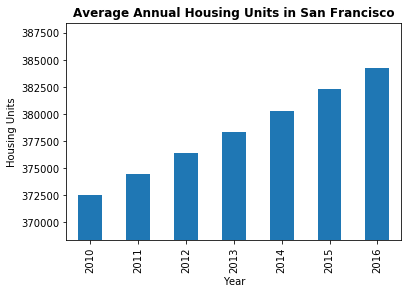

In [64]:
# Optional Challenge: Use the min, max, and std to scale the y limits of the chart
# YOUR CODE HERE!

plot_mean_housing_units = mean_housing_units.plot.bar(ylim=((miny-std), (maxy+std)))
plt.title('Average Annual Housing Units in San Francisco', fontweight='bold')
plt.ylabel('Housing Units')
plt.xlabel('Year')

- - - 

## Average Prices per Square Foot

In this section, you will calculate the average gross rent and average sales price for each year. Plot the results as a line chart.

### Average Gross Rent in San Francisco Per Year

In [65]:
# Calculate the average gross rent and average sale price per square foot
# YOUR CODE HERE!
sfo_data_by_year.head()
avg_gross_rent = sfo_data_by_year['gross_rent']
avg_gross_rent

year
2010    1239
2011    1530
2012    2324
2013    2971
2014    3528
2015    3739
2016    4390
Name: gross_rent, dtype: int64

In [66]:
min_rent = avg_gross_rent.min()
min_rent

1239

In [67]:
max_rent = avg_gross_rent.max()
max_rent

4390

In [68]:
std_rent = avg_gross_rent.std()
std_rent

1172.1171321282577

In [69]:
avg_ppsqft = sfo_data_by_year['sale_price_sqr_foot']
avg_ppsqft

year
2010    369.344353
2011    341.903429
2012    399.389968
2013    483.600304
2014    556.277273
2015    632.540352
2016    697.643709
Name: sale_price_sqr_foot, dtype: float64

In [70]:
min_ppsqft = avg_ppsqft.min()
min_ppsqft

341.90342918010583

In [71]:
max_ppsqft = avg_ppsqft.max()
max_ppsqft

697.6437091165371

In [72]:
std_ppsqft = avg_ppsqft.std()
std_ppsqft

136.7483382811194

Text(0.5, 0, 'Year')

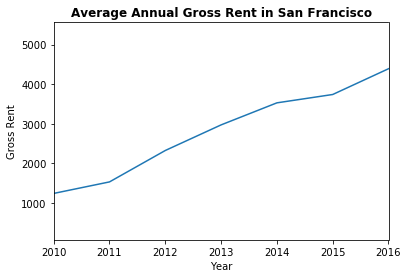

In [73]:
# Plot the Average Gross Rent per Year as a Line Chart 
# YOUR CODE HERE!
plot_avg_gross_rent = avg_gross_rent.plot.line(ylim=((min_rent-std_rent), (max_rent+std_rent)))
plt.title('Average Annual Gross Rent in San Francisco', fontweight='bold')
plt.ylabel('Gross Rent')
plt.xlabel('Year')

### Average Sales Price per Year

Text(0.5, 0, 'Year')

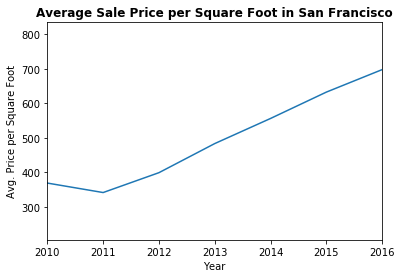

In [74]:
# Plot the Average Sales Price per Year as a line chart
# YOUR CODE HERE!
plot_avg_ppsqft = avg_ppsqft.plot.line(x='Year', y='Avg Price per Square Foot', ylim=((min_ppsqft-std_ppsqft), (max_ppsqft+std_ppsqft)))
plt.title('Average Sale Price per Square Foot in San Francisco', fontweight='bold')
plt.ylabel('Avg. Price per Square Foot')
plt.xlabel('Year')

- - - 

## Average Prices by Neighborhood

In this section, you will use hvplot to create an interactive visulization of the Average Prices with a dropdown selector for the neighborhood.

Hint: It will be easier to create a new DataFrame from grouping the data and calculating the mean prices for each year and neighborhood

In [75]:
# Group by year and neighborhood and then create a new dataframe of the mean values
# YOUR CODE HERE!
sfo_data.head()
sfo_data =sfo_data.reset_index()
sfo_data.head(10)

,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,2010,Alamo Square,291.182945,372560,1239
1,2010,Anza Vista,267.932583,372560,1239
2,2010,Bayview,170.098665,372560,1239
3,2010,Buena Vista Park,347.394919,372560,1239
4,2010,Central Richmond,319.027623,372560,1239
5,2010,Central Sunset,418.172493,372560,1239
6,2010,Corona Heights,369.359338,372560,1239
7,2010,Cow Hollow,569.379968,372560,1239
8,2010,Croker Amazon,165.645730,372560,1239
9,2010,Diamond Heights,456.930822,372560,1239


In [76]:
sfo_data.head(10)

,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,2010,Alamo Square,291.182945,372560,1239
1,2010,Anza Vista,267.932583,372560,1239
2,2010,Bayview,170.098665,372560,1239
3,2010,Buena Vista Park,347.394919,372560,1239
4,2010,Central Richmond,319.027623,372560,1239
5,2010,Central Sunset,418.172493,372560,1239
6,2010,Corona Heights,369.359338,372560,1239
7,2010,Cow Hollow,569.379968,372560,1239
8,2010,Croker Amazon,165.645730,372560,1239
9,2010,Diamond Heights,456.930822,372560,1239


In [77]:
year_and_neighborhood_data = sfo_data.groupby(['year','neighborhood']).mean()
year_and_neighborhood_data.head()

sale_price_sqr_foot  housing_units  gross_rent
year neighborhood                                                    
2010 Alamo Square               291.182945         372560        1239
     Anza Vista                 267.932583         372560        1239
     Bayview                    170.098665         372560        1239
     Buena Vista Park           347.394919         372560        1239
     Central Richmond           319.027623         372560        1239

In [78]:
avg_ppsqft_by_year_and_neighborhood = year_and_neighborhood_data['sale_price_sqr_foot']
avg_ppsqft_by_year_and_neighborhood.head(25)

year  neighborhood                 
2010  Alamo Square                     291.182945
      Anza Vista                       267.932583
      Bayview                          170.098665
      Buena Vista Park                 347.394919
      Central Richmond                 319.027623
      Central Sunset                   418.172493
      Corona Heights                   369.359338
      Cow Hollow                       569.379968
      Croker Amazon                    165.645730
      Diamond Heights                  456.930822
      Downtown                         241.804552
      Eureka Valley/Dolores Heights    403.118313
      Excelsior                        364.928336
      Financial District North         401.749967
      Financial District South         162.821210
      Forest Knolls                    209.049327
      Glen Park                        715.586438
      Golden Gate Heights              551.801119
      Haight Ashbury                   254.473779
      Hayes Va

In [79]:
neighborhood_list = sfo_data['neighborhood'].unique()
neighborhood_list

array(['Alamo Square', 'Anza Vista', 'Bayview', 'Buena Vista Park',
       'Central Richmond', 'Central Sunset', 'Corona Heights',
       'Cow Hollow', 'Croker Amazon', 'Diamond Heights', 'Downtown ',
       'Eureka Valley/Dolores Heights', 'Excelsior',
       'Financial District North', 'Financial District South',
       'Forest Knolls', 'Glen Park', 'Golden Gate Heights',
       'Haight Ashbury', 'Hayes Valley', 'Hunters Point', 'Ingleside ',
       'Inner Mission', 'Inner Parkside', 'Inner Richmond',
       'Inner Sunset', 'Jordan Park/Laurel Heights',
       'Lake --The Presidio', 'Lone Mountain', 'Lower Pacific Heights',
       'Marina', 'Miraloma Park', 'Mission Bay', 'Mission Dolores',
       'Mission Terrace', 'Nob Hill', 'Noe Valley', 'Oceanview',
       'Outer Parkside', 'Outer Richmond ', 'Outer Sunset',
       'Pacific Heights', 'Park North', 'Parkside',
       'Parnassus/Ashbury Heights', 'Portola', 'Potrero Hill',
       'Presidio Heights', 'Russian Hill', 'South Beach',


In [80]:
# Use hvplot to create an interactive line chart of the average price per sq ft.
# The plot should have a dropdown selector for the neighborhood
# YOUR CODE HERE!
import panel as pn
from panel.interact import interact
from panel import widgets

In [81]:
pn.extension()
def choose_neighborhood(neighborhood):
    return neighborhood

In [82]:
neighborhood_list
interact(choose_neighborhood, neighborhood=neighborhood_list)

Column
    [0] Column
        [0] Select(name='neighborhood', options=['Alamo Square', ...], value='Alamo Square')
    [1] Row
        [0] Markdown(str, name='interactive01866')

In [83]:
plot_year_and_neighborhood_data = year_and_neighborhood_data.hvplot.line(x='year', y='sale_price_sqr_foot', groupby='neighborhood')
plot_year_and_neighborhood_data

:DynamicMap   [neighborhood]
   :Curve   [year]   (sale_price_sqr_foot)

- - - 

## The Top 10 Most Expensive Neighborhoods

In this section, you will need to calculate the mean sale price for each neighborhood and then sort the values to obtain the top 10 most expensive neighborhoods on average. Plot the results as a bar chart.

In [84]:
# Getting the data from the top 10 expensive neighborhoods
# YOUR CODE HERE!
neighborhoods = sfo_data.groupby(['neighborhood']).mean()
neighborhoods.head()

,year,sale_price_sqr_foot,housing_units,gross_rent
neighborhood,,,,
Alamo Square,2013.000000,366.020712,378401.0,2817.285714
Anza Vista,2013.333333,373.382198,379050.0,3031.833333
Bayview,2012.000000,204.588623,376454.0,2318.400000
Bayview Heights,2015.000000,590.792839,382295.0,3739.000000
Bernal Heights,2013.500000,576.746488,379374.5,3080.333333


In [85]:
avg_ppsqft_by_neighborhood = neighborhoods['sale_price_sqr_foot'].sort_values(ascending=False)

In [86]:
top_10_most_expensive_neighborhoods = avg_ppsqft_by_neighborhood.iloc[0:10]
top_10_most_expensive_neighborhoods

neighborhood
Union Square District    903.993258
Merced Heights           788.844818
Miraloma Park            779.810842
Pacific Heights          689.555817
Westwood Park            687.087575
Telegraph Hill           676.506578
Presidio Heights         675.350212
Cow Hollow               665.964042
Potrero Hill             662.013613
South Beach              650.124479
Name: sale_price_sqr_foot, dtype: float64

In [87]:
# Plotting the data from the top 10 expensive neighborhoods
# YOUR CODE HERE!
plot_top_10_most_expensive_neighborhoods = top_10_most_expensive_neighborhoods.hvplot.bar(x='neighborhood', y='sale_price_sqr_foot', title='Top 10 Most Expensive Neighborhoods in SFO', xlabel='Neighborhood', ylabel='Avg. Sale Price per Square Foot', rot=90, width=600, height=400)
plot_top_10_most_expensive_neighborhoods

:Bars   [neighborhood]   (sale_price_sqr_foot)

- - - 

## Parallel Coordinates and Parallel Categories Analysis

In this section, you will use plotly express to create parallel coordinates and parallel categories visualizations so that investors can interactively filter and explore various factors related to the sales price of the neighborhoods. 

Using the DataFrame of Average values per neighborhood (calculated above), create the following visualizations:
1. Create a Parallel Coordinates Plot
2. Create a Parallel Categories Plot

In [88]:
# Parallel Coordinates Plot
# YOUR CODE HERE!
avg_neighborhood_values = sfo_data.groupby('neighborhood').mean()
avg_neighborhood_values = avg_neighborhood_values.drop(columns=['year'])
avg_neighborhood_values_top_10 = avg_neighborhood_values.sort_values('sale_price_sqr_foot', ascending=False)
avg_neighborhood_values_top_10 = avg_neighborhood_values_top_10.iloc[0 : 10]
avg_neighborhood_values_top_10 = avg_neighborhood_values_top_10.reset_index()
avg_neighborhood_values_top_10

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,Union Square District,903.993258,377427.50,2555.166667
1,Merced Heights,788.844818,380348.00,3414.000000
2,Miraloma Park,779.810842,375967.25,2155.250000
3,Pacific Heights,689.555817,378401.00,2817.285714
4,Westwood Park,687.087575,382295.00,3959.000000
5,Telegraph Hill,676.506578,378401.00,2817.285714
6,Presidio Heights,675.350212,377752.00,2663.666667
7,Cow Hollow,665.964042,378401.00,2817.285714
8,Potrero Hill,662.013613,378401.00,2817.285714
9,South Beach,650.124479,375805.00,2099.000000


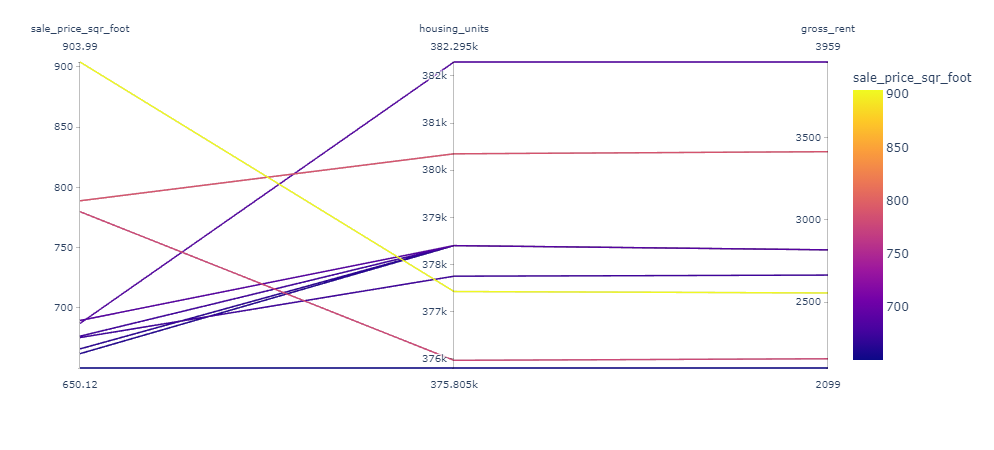

In [89]:
parallel_coordinates_plot_avg_neighborhood_values = px.parallel_coordinates(avg_neighborhood_values_top_10, color='sale_price_sqr_foot')
parallel_coordinates_plot_avg_neighborhood_values.show()

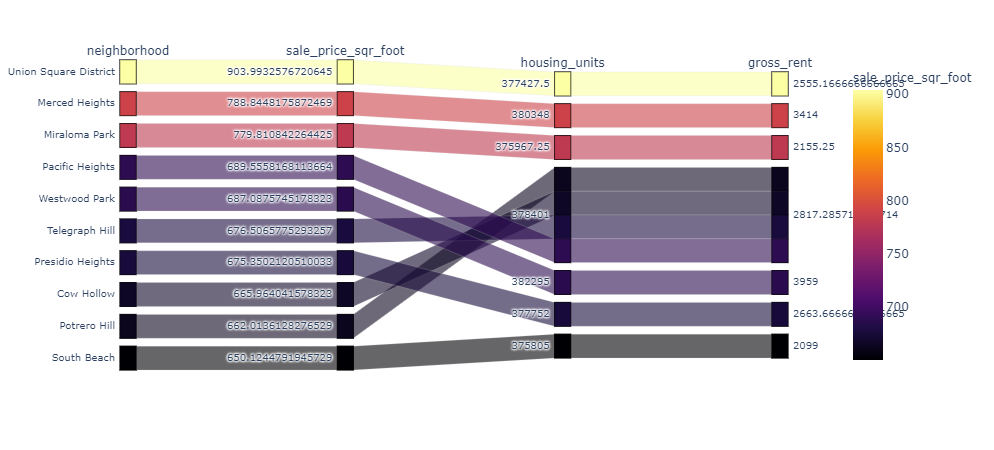

In [90]:
# Parallel Categories Plot
# YOUR CODE HERE!
parallel_categories_plot_avg_neighborhood_values = px.parallel_categories(avg_neighborhood_values_top_10, 
                                                                          dimensions=['neighborhood', 'sale_price_sqr_foot', 'housing_units', 'gross_rent'], 
                                                                          color='sale_price_sqr_foot',
                                                                          color_continuous_scale = px.colors.sequential.Inferno)

parallel_categories_plot_avg_neighborhood_values.show()

- - - 

## Neighborhood Map

In this section, you will read in neighboor location data and build an interactive map with the average prices per neighborhood. Use a scatter_mapbox from plotly express to create the visualization. Remember, you will need your mapbox api key for this.

### Load Location Data

In [91]:
# Load neighborhoods coordinates data
file_path = Path("Data/neighborhoods_coordinates.csv")
df_neighborhood_locations = pd.read_csv(file_path)
df_neighborhood_locations.head()


,Neighborhood,Lat,Lon
0,Alamo Square,37.791012,-122.402100
1,Anza Vista,37.779598,-122.443451
2,Bayview,37.734670,-122.401060
3,Bayview Heights,37.728740,-122.410980
4,Bernal Heights,37.728630,-122.443050


### Data Preparation

You will need to join the location data with the mean prices per neighborhood

1. Calculate the mean values for each neighborhood
2. Join the average values with the neighborhood locations

In [92]:
# Calculate the mean values for each neighborhood
# YOUR CODE HERE!
avg_neighborhood_values = avg_neighborhood_values.reset_index()
avg_neighborhood_values.head()



,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,Alamo Square,366.020712,378401.0,2817.285714
1,Anza Vista,373.382198,379050.0,3031.833333
2,Bayview,204.588623,376454.0,2318.400000
3,Bayview Heights,590.792839,382295.0,3739.000000
4,Bernal Heights,576.746488,379374.5,3080.333333


In [93]:
# Join the average values with the neighborhood locations
# YOUR CODE HERE!
df_neighborhood_locations.count()

Neighborhood    73
Lat             73
Lon             73
dtype: int64

In [94]:
avg_neighborhood_values.count()

neighborhood           73
sale_price_sqr_foot    73
housing_units          73
gross_rent             73
dtype: int64

In [95]:
neighborhood_values_locations = pd.concat([df_neighborhood_locations, avg_neighborhood_values], axis=1)
neighborhood_values_locations.head()

,Neighborhood,Lat,Lon,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,Alamo Square,37.791012,-122.402100,Alamo Square,366.020712,378401.0,2817.285714
1,Anza Vista,37.779598,-122.443451,Anza Vista,373.382198,379050.0,3031.833333
2,Bayview,37.734670,-122.401060,Bayview,204.588623,376454.0,2318.400000
3,Bayview Heights,37.728740,-122.410980,Bayview Heights,590.792839,382295.0,3739.000000
4,Bernal Heights,37.728630,-122.443050,Bernal Heights,576.746488,379374.5,3080.333333


In [96]:
neighborhood_values_locations = neighborhood_values_locations.drop(columns=['neighborhood'])
neighborhood_values_locations.head()

,Neighborhood,Lat,Lon,sale_price_sqr_foot,housing_units,gross_rent
0,Alamo Square,37.791012,-122.402100,366.020712,378401.0,2817.285714
1,Anza Vista,37.779598,-122.443451,373.382198,379050.0,3031.833333
2,Bayview,37.734670,-122.401060,204.588623,376454.0,2318.400000
3,Bayview Heights,37.728740,-122.410980,590.792839,382295.0,3739.000000
4,Bernal Heights,37.728630,-122.443050,576.746488,379374.5,3080.333333


### Mapbox Visualization

Plot the aveage values per neighborhood with a plotly express scatter_mapbox visualization.

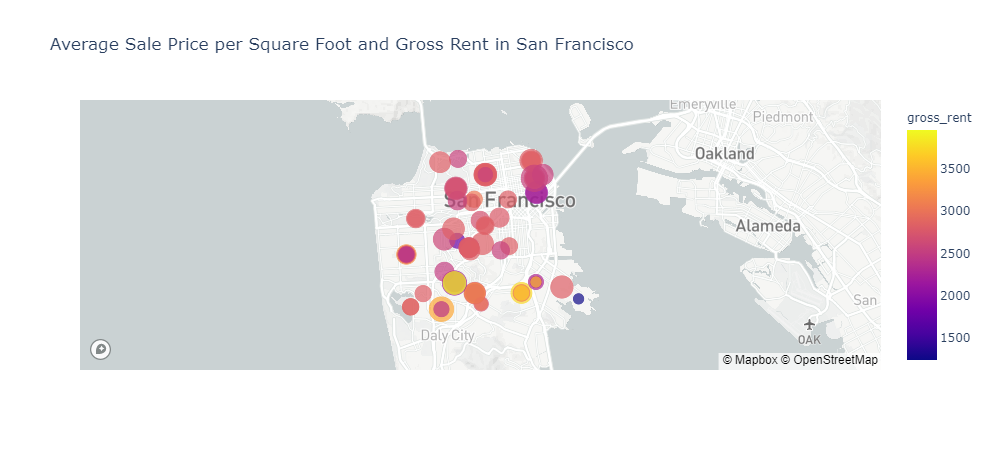

In [97]:
# Create a scatter mapbox to analyze neighborhood info
# YOUR CODE HERE!
mapbox_plot_gross_rent_ppsqft = px.scatter_mapbox(
    neighborhood_values_locations,
    lat='Lat',
    lon='Lon',
    color='gross_rent',
    size='sale_price_sqr_foot',
    title='Average Sale Price per Square Foot and Gross Rent in San Francisco',
    zoom=10
)
mapbox_plot_gross_rent_ppsqft.show()

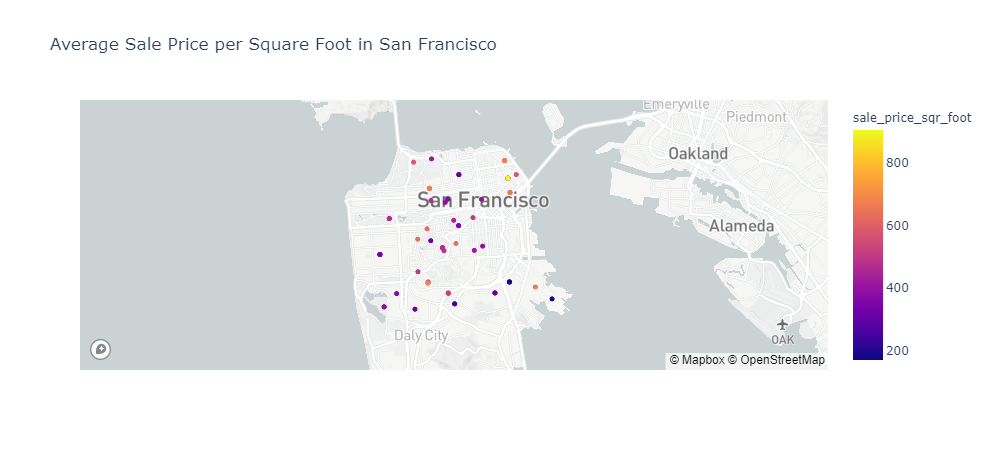

In [98]:
mapbox_plot_avg_ppsqft = px.scatter_mapbox(
    neighborhood_values_locations,
    lat='Lat',
    lon='Lon',
    color='sale_price_sqr_foot',
    title='Average Sale Price per Square Foot in San Francisco',
    zoom=10)
mapbox_plot_avg_ppsqft.show()